In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1

The rate of change in temperature with ocean depth (temperature gradient) is a useful measure for oceanographers when evaluating oceanography models. We can use a somewhat recent [GEOTRACES cruise dataset](https://www.bco-dmo.org/dataset/777951) to find the temperature gradient over a small region of the ocean using CTD data.

Download the "GP15_Leg1_STN345.csv" file from CANVAS or my GitHub. The data file contains several columns, most of which are not relavent to us here.

**1.** **Create a plot of Pressure (proxy for depth) vs Temperature.** Units of pressure are in dbar while temperature is given in celsius. Make sure to invert the y-axis of your plot so that $0$ dbar is at the top of the y-axis and $500$ dbar is at the bottom. Identify which data correspond to Station 3, Station 4, and Station 5 by using a different color for each station in the plot.

**2.** To use our differencing function, we will need a way to produce evenly spaced data to difference over. There are several methods to do this which vary in complexity. The method we will employ involves using a LOWESS regression model to estimate $\hat{y_i}$ values at every $x_i$, then we will apply a spline fit to our LOWESS regression to produce evenly spaced data to difference over.

For the [LOWESS function](https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html), we can use the statsmodels library:

`from statsmodels.nonparametric.smoothers_lowess import lowess`

To use the model, you can use the following code:

`lowess_result = lowess(temp, pressure, frac=0.20, return_sorted=True)`

Where the result of the function is stored in `lowess_result`, which will contain two columns: the sorted x values (column 1) and the estimated y values (column 2).

Note: we are using `frac=0.20` here, which tells the LOWESS function to use a smoothing window that incorporates 20% of the data points.

**Once you have our LOWESS function working, recreate the plot from part 1, but include the LOWESS fit.** If done correctly, you should get a reasonably smooth line that fits most of the data pretty well.

**3.** I am including the code you may use for the spline fit:

```
# Fit spline: pressure (x), temperature (y)
p_low_smooth = pressure_smooth[pressure_smooth < 40]
p_high_smooth = pressure_smooth[pressure_smooth >= 40]
t_low_smooth = temp_smooth[pressure_smooth < 40]
t_high_smooth = temp_smooth[pressure_smooth >= 40]
s = 0.01
spline1 = UnivariateSpline(p_low_smooth, t_low_smooth, k = 1, s = s)  # s=None = interpolation
spline2 = UnivariateSpline(p_high_smooth, t_high_smooth, k = 1, s = s)  # s=None = interpolation

# Evaluate spline on a smooth pressure grid
pressure_spline1 = np.arange(0, 41, 1)
pressure_spline2 = np.arange(40, pressure.max()+1, 1)
temp_spline1 = spline1(pressure_spline1)
temp_spline2 = spline2(pressure_spline2)
temp_spline = np.concatenate((temp_spline1, temp_spline2))
pressure_spline = np.concatenate((pressure_spline1, pressure_spline2))
```

You may need to update the above code to work, depending on what you have called your specific variables/output. `temp_spline` and `pressure_spline` contain evenly spaced data we can use to find a numerical difference.

**Use the forward-differencing method on the evenly spaced data to find the rate of change in temperature with pressure. Plot pressure vs $dT/dP$. What do you notice about the temperature gradient plot?**





# Q2

[Debye's theory](https://en.wikipedia.org/wiki/Debye_model) of solids gives the [heat capacity](https://en.wikipedia.org/wiki/Heat_capacity) of a solid at temperature $T$ as:

$$
\begin{align}
C_V = 9V\rho k_B \left( \frac{T}{\theta _D} \right)^3 \int_{0}^{\theta_D / T} \frac{x^4 e^x}{(e^{x-1})^2} dx \tag{1}
\end{align}
$$

Where $V$ is the volume of the solid, $\rho$ is the number density of atoms, $k_B$ is [Boltzmann's constant](https://en.wikipedia.org/wiki/Boltzmann_constant), $\theta_D$ is the Debye Temperature, which is a property of solids dependent upon their density and speed of sound within the solid.

**1.** Write a function `cv(T)` that calculates $C_V$ for a given temperature input `T` for the specific case where a $1000 \ \text{cm}^3$ block of aluminum with number density $\rho = 6.033 \times 10^{28} \ \frac{\text{atoms}}{\text{m}^3}$ and Debye Temperature $\theta_D = 428 \ \text{K}$. To evaluate the integral, use Gaussian Quadrature with $N = 50$ steps.

**2.** Use your function to create a plot of heat capacity ($C_V$) vs temperature ($T$) over $T=5 \ \text{K}$ and $T=500 \ \text{K}$.

**3.** Could we use Simpson's Rule to evaluate this integral? Try it out. Explain why or why not?

# Q3

Newton's explanation for the motion of planets is one of the defining moments in physics. For two interacting bodies (say a planet, $m$, and the Sun, $M$), the gravitational force between them is given by:

$$
\begin{align}
F_{(G)} = -G \frac{mM}{r^2} \tag{2}
\end{align}
$$

Where $G$ is Newton's Gravitational Constant, $m$ is the mass of the planet, $M$ is the mass of the Sun, and $r$ is the distance between the two bodies.

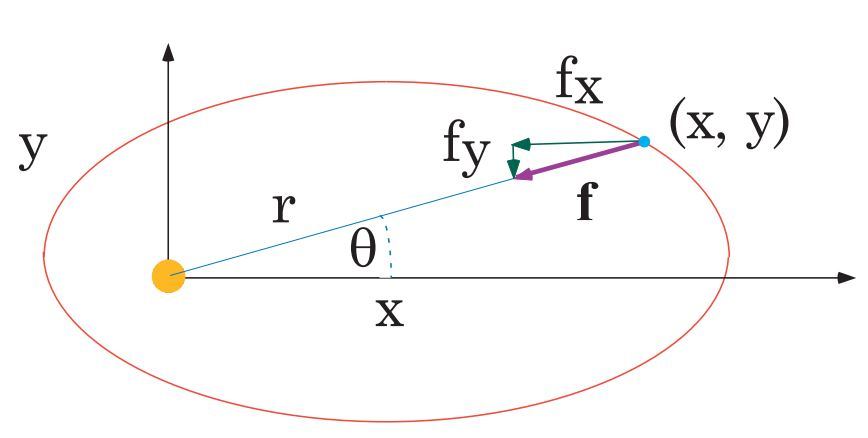

Solving for the position of the planet ($x,y$) and velocity ($v$) of the planet as it rotates about the Sun can be done if we express the force on the planet in vector components:

$$
\begin{align}
f_x &= F_{(G)} \cos{\theta} = F_{(G)} \frac{x}{r} \tag{3} \\
\\
f_y &= F_{(G)} \sin{\theta} = F_{(G)} \frac{y}{r} \tag{4} \\
\\
r &= \sqrt{x^2 + y^2} \tag{5}
\end{align}
$$

We can now write the equations of motion as two coupled 2nd order differential equations:

$$
\begin{align}
\frac{d^2 x}{dt^2} &= -GM\frac{x}{r^3} \tag{6} \\
\\
\frac{d^2 y}{dt^2} &= -GM\frac{y}{r^3} \tag{7}
\end{align}
$$

**1.** First, let's assume that the product $GM = 1$ to simplify things. Now, we'll use the following initial conditions:

* $x_0 = 0.5$
* $y_0 = 0.0$
* $v_{x_0} = 0.0$
* $v_{y_0} = 1.63$

**Use an ODE solver that uses an RK4 (or similar) method to evaluate our system of differential equations (eq 6 and eq 7) for the position and velocity of the planet as it revolves about the Sun.** You will need to choose a length of time to evaluate over as well as a time step size. Choose a $t_{end}$ so that you can create a "closed" plot of the orbit. It should form a nice ellipse.  

**2.** When is the velocity of the planet greatest? **Make a plot of the speed ($v$) vs distance ($r$) from the sun.** Discuss the result.